<a href="https://colab.research.google.com/github/RLWH/reinforcement-learning-notebook/blob/master/5.%20Value%20Approximation/Value_Function_Approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. Value Approximation

Basically, all the model-free methods require either value function or state-value function, that essentially they are a one-to-one mapping function for a given state S. These algorithms might be able to solve small to medium problems, but they may not be able to solve large problems like Backgammon ($10^{20}$ states), Computer Go ($10^{170}$ states), or other problems that have a continuous state space. 

So, how to scale up the model-free methods? The answer is by function approximation. 

#### The feature weights
In this chapter, we will introduce a new weight vector $\vec{w} \in \mathop{\mathbb{R^d}}$.

Hence, we will rewrite the value function into $\hat{v}(s, \vec{w}) \approx v_{\pi}(s)$, which means the value function uses the weight vector to approximate the true value function. On the other hand, we can also approximate state-value function $\hat{q}(s, a, \vec{w}) \approx q_{\pi}(s,a)$. The goal of having the feature weights is to generalise the learnings from seen states to unseen states. 

On the side note, extending reinforcement learning to function approximation also makes it applicable to partially observable problems, where the full state is not available to the agent. 



# Value-function Approximation

In order to use SGD to approximate a value function, we need to first define the objective function. 

The goal of SGD is to find a parameter vector $w$ that minimise the mean-squared error between the approximate value function $\hat{v}(s, \vec w)$ and the true value function $v_{\pi}(s)$
Of course, the states are not equally important, therefore, we are obligated to specify a state distribution $\mu(s) \geq 0, \sum_{s} = 1$, to represent how much we care about the error in each state. 

Suppose the true value $v_{\pi}(s)$ exists, the formulation of the objective function, also known as the *Mean Squared Value Error*, becomes
\begin{equation}
\begin{split}
J(\vec w) & = \sum_s\mu(s)[v_{\pi}(s) - \hat{v}(s, \vec{w})]^2 \\
& = \mathop{\mathbb{E_{\pi}}}[(v_{\pi}(s) - \hat{v}(s, \vec{w}))]
\end{split}
\end{equation}
for on-policy distribution in episodic tasks.

Ideally, the goal in terms of $J(\vec{w})$ would be to find a global optimum, where a weight vector $\vec{w^*}$ such that $J(\vec{w^*}) \leq J(\vec{w})$ for all possible $\vec{w}. $

## Stochastic gradient descent methods

Suppose the weight vector is a column vector with a fixed number of real valued components, $\vec{w} = (w_1, w_2, w_3, ..., w_d)^{T}$, and the approximate value function $\hat{v}(s, \vec{w})$ is a differentiable function of $\vec{w}$ for all $s \in S$. 

The weight vector $\vec{w}$ will be updated at each of the discrete time steps, for $t=0, 1, 2, 3, ...$, so we instead use $\vec{w_t}$ to represent the weight vector.

The SGD method adjusts the weight vector at each time step, or after each example, by a small amount in the direction that would most reduce the error on that example.
\begin{equation}
\Delta{\vec{w}} = \alpha [v_{\pi}(S_t) - \hat{v}(S,\vec{w_t})] \nabla{\hat{v}}(S_t, \vec{w_t})
\end{equation},
where $\alpha$ is a positive step-size parameter, and $\nabla f(\vec{w})$, for any scalar expression $f(\vec{w})$ that is a function of a vector, denotes the column vector of partial derivatives of the expression w.r.t the components of the vector.

## Incremental Prediction Algorithms

In the previous discussion we have assumed the true value $v_{\pi}$ has been given. However, in reinforcement learning problem, there is no supervisor, only rewards. Thus, in practice, we need to substitute a target for $v_{\pi}(s)$. We can denote $U_t \in \mathop{\mathbb{R}}$, of the *t*th training example, such that $S_t \mapsto U_t$. We have to be aware of it that $U_t$ is not the true value, $v_{\pi}(S_t)$, but some, possibly random, approximation to it. 

Thus, in general the gradient of $\vec{w}$ can be rewritten as
\begin{equation}
\Delta{\vec{w}} = \alpha [U_t - \hat{v}(S,\vec{w_t})] \nabla_{\vec{w}}{\hat{v}}(S_t, \vec{w_t})
\end{equation}

$U_t$ can be approximated by various methods:

### 1. Monte Carlo
For Monte Carlo method, the target is the return $G_t$, or we can assign $U_t = G_t$.

The gradient of the weight then become
\begin{equation}
\Delta{\vec{w}} = \alpha [G_t - \hat{v}(S,\vec{w_t})] \nabla_{\vec{w}}{\hat{v}}(S_t, \vec{w_t})
\end{equation}

##### Pseudo Code
---
```
Input: The policy pi to be evaluated
Input: a differentiable function v_hat that takes in state and weights and map to a value: S x Rd -> R

Algorithm parameter: stepsize alpha > 0
Initialise value-function weights w (dimension d) arbitrarily

Loop forever (for each episode):
        Generate an episode S0, A0, R1, S1, A1, ..., RT, ST using pi
        Loop for each step of episode, t=0, 1, ..., T-1:
                w = w + alpha * (Gt - vhat(st, w)) * grad_vhat(st, w)
```
---

### 2. TD(0)

For one-step TD, the target $U_t = R_{t+1} + \gamma \hat{v}(S_{t+1}, \vec{w})$

The gradient of the weight then becomes
\begin{equation}
\Delta{\vec{w}} = \alpha [R_{t+1} + \gamma \hat{v}(S_{t+1}, \vec{w}) - \hat{v}(S,\vec{w_t})] \nabla_{\vec{w}}{\hat{v}}(S_t, \vec{w_t})
\end{equation}

There is no guarantee to converge by using a bootstrapping method like TD(0) or TD($\lambda$), as it relies on a bootstraping estimate to update the gradient. Bootstraping methods, in fact, are not the instences of true gradient descent (Barnard, 1993), as they all depend on the current value of the weight vector $\vec{w_t}$, which imples that they will be biased and that they will not produce a true gradient-descent method. These methods are called *semi-gradient* methods.

Although semi-gradient methods do not converge as robustly as gradient methods, they do converge reliably in important cases such as the linear cases. Another advantage for semi-gradient methods is that they enable learning to be coninual and online, without waiting for the end of an episode.

##### Pseudo Code
---
```
Input: The policy pi to be evaluated
Input: A differentiable function v_hat(state, weights) |-> R such that v_hat(terminal, .) = 0
Algorithm parameter: step size alpha > 0
Initialise value-function weights w as a d-dimensional zero vectors

Loop for each episode:
        Initialise S
        Loop for each step of episode:
                Choose A ~ pi(.|S)
                Take action A, observe R, S'
                w = w + alpha * (R + gamma * v_hat(S', w) - v_hat(S, w)) * grad_vhat(S, w)
        until S is terminal
```
---

### 3. TD($\lambda$)

For TD lambda, the target is the $\lambda$-return $G_t^{\lambda}$. i.e. $U_t = G_t^{\lambda}$

The gradient becomes
\begin{equation}
\Delta{\vec{w}} = \alpha [G_t^{\lambda} - \hat{v}(S,\vec{w_t})] \nabla_{\vec{w}}{\hat{v}}(S_t, \vec{w_t})
\end{equation}





## Linear Methods of Value Approximation

One of the most important special cases of function approximation is that, where the approximate function, $\hat{v}(\cdot, \vec{w})$, is a linear function of the weight vector, $\vec{w}$

Denote a real-valued feature vector
\begin{equation}
\vec{x}(s) = (x_1(s), x_2(s), ..., x_d(s))^{T}
\end{equation}
with the same number of components as $\vec{w}$

Linear methods approximate the state-value function by the inner product between $\vec{w}$ and $\vec{x}$, such that 

\begin{equation}
\begin{split}
\hat{v}(s, \vec{w}) & = \vec{w} ^T \vec{x}(s) \\
& = \sum_{i=1}^{d}w_i x_i(s)
\end{split}
\end{equation}


Note: Feature vector can be anything that tells you about the state space. For example:
- Distance of robot from landmarks
- Trends in the stock market
- Piece and pawn configurations in chess


The update rule is particularly simple with Linear Value Function Approximation
\begin{equation}
\begin{split}
\nabla_{\vec{w}}\hat{v}(s, \vec{w}) &= \vec{x}(s) \\
\Delta \vec{w} &= \alpha[v_{\pi}(s) - \hat{v}(s, \vec{w})] \vec{x}(s)
\end{split}
\end{equation}

In other words:
**Update = step-size x prediction error x feature value**

Since in the linear case there is only one optimum, and thus any method  that is guaranteed to converge to or near a local optimum is automatically guaranteed to converge to or near the global optimum. 

### Monte Carlo with Linear Methods

- The return $G_t$ is an unbiased, noisy sample of true value $v_{\pi}(s_t)$
- The "training data"

\begin{equation}
\langle S_1, G_1\rangle, \langle S_2, G_2\rangle, ..., \langle S_T, G_T\rangle
\end{equation}

- The gradient used for MC policy evaluation
\begin{equation}
\Delta{\vec{w}} = \alpha [G_t^{\lambda} - \hat{v}(S,\vec{w_t})] \vec{x}(S_t)
\end{equation}

The gradient MC algorithm converges to the global optimum of $J$ under linear function approximation if $\alpha$ is reduced over time according to the usual conditions.

### TD(0) with Linear Methods
- The TD-target $R_{t+1} + \gamma \hat{v}(S_{t+1}, \vec{w})$ is a biased sample of true value $v_{\pi}(s_t)$
- This can still apply supervised learning to the "training data"
\begin{equation}
\langle S_1, R_2 + \gamma \hat{v}(S_2, \vec{w})\rangle, \langle S_2, R_3 + \gamma \hat{v}(S_3, \vec{w})\rangle, ..., \langle S_{T-1}, R_T + \gamma \hat{v}(S_T, \vec{w})\rangle
\end{equation}
- The gradient used for TD(0) policy evaluation
\begin{equation}
\begin{split}
\Delta{\vec{w}} &= \alpha [R + \gamma \hat{v}(s_{t+1}, \vec{w}) - \hat{v}(S,\vec{w_t})] \vec{x}(S_t) \\
&=\alpha \delta \vec{x}(s)
\end{split}
\end{equation}
- Linear TD(0) converges close to the global optimum, which is called the *TD Fixed point* (Proof in p.206), where
\begin{equation}
J(\vec{w}_{TD}) \leq \frac{1}{1-\gamma} \min_\vec{w} J(\vec{w})
\end{equation}

###  Forward-view linear TD($\lambda$) and Backward-view linear TD($\lambda$)

- The $\lambda$-return $G_t^{\lambda}$ is also a biased sample of true value $v_{\pi}(s)$
- Again, it can apply supervised learning to "training data"\begin{equation}
\langle S_1, G_1^{\lambda}\rangle, \langle S_2, G_2^{\lambda}\rangle, ..., \langle S_{T-1}, G_{T-1}^{\lambda}\rangle
\end{equation}

#### Forward view linear TD($\lambda$)
\begin{equation}
\Delta{\vec{w}} = \alpha [G_t^{\lambda} - \hat{v}(S,\vec{w_t})] \vec{x}(S_t)
\end{equation}

#### Backward vieww linear TD($\lambda$)
\begin{equation}
\begin{split}
& \delta_t = R_{t+1} + \gamma \hat{v}(S_{t+1}, \vec{w}) - \hat{v}(S_t, \vec{w}) \\
& E_t = \gamma \lambda E_{t-1} + \vec{x}(S_t) \\
& \Delta{\vec{w}} = \alpha \delta_t E_t
\end{split}
\end{equation}

# Implementation - 1000 state random walk

We revisit a random walk problem, but this time we add more states into the environment. Instead of having 5 states in between, we now have 1000 states, and the starting state will be the 500th state


In [0]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import sys

from collections import defaultdict
from gym.envs.toy_text import discrete

In [0]:
LEFT = 0
RIGHT = 1

In [0]:
class RandomWalkEnv(discrete.DiscreteEnv):
    """
    A Random Walk environment for Example 9.1
    """
    
    metadata = {'render.modes': ['human', 'ansi']}
    
    
    def __init__(self, nS, start_state):
        nS = nS
        
        actions = [LEFT, RIGHT]
        nA = len(actions)
        self.start_state = start_state
        
        # Calculate transition probabilities and rewards
        P = {}
        
        for s in range(nS):
            
            P[s] = None
            
            # At each state, left = right = 0.5
            # and then distribute to 100 states
                
            # Initialise all the vectors
            all_states = np.arange(nS)
            all_probs = np.zeros(nS)

            all_rewards = np.zeros(nS)
            all_rewards[0] = -1
            all_rewards[nS - 1] = 1

            all_done = np.zeros(nS)
            all_done[0] = 1
            all_done[nS - 1] = 1

            if s == 0 or s == (nS - 1):
                continue

            # Update the probs
            all_probs[max(1, s-100):s] = 0.5/100
            if (s - 100) < 0:
                all_probs[0] = 0.5 - abs(s - 1) * (0.5/100)

            all_probs[(s + 1):min(nS, s + 1 + 100)] = 0.5/100
            if (s + 100) > (nS - 1):
                all_probs[nS - 1] = 0.5 - abs(nS - (s + 2)) * (0.5/100)

            # Convert to zipped list
            psa = list(zip(all_probs, all_states, all_rewards, all_done))

            P[s] = psa
        
        isd = np.zeros(nS)
        isd[start_state] = 1
        
        super(RandomWalkEnv, self).__init__(nS, nA, P, isd)
        
    def step(self):
        transitions = self.P[self.s]
#         print(transitions)
        probs = np.array([t[0] for t in transitions])
        i = np.random.choice(np.flatnonzero(probs == probs.max()))
#         print(i)
#         i = categorical_sample([t[0] for t in transitions], self.np_random)
        p, s, r, d= transitions[i]
        self.s = s
#         self.lastaction = a
        return (s, r, d, {"prob" : p})
     
    def render(self, mode='human'):
        outfile = sys.stdout
        
        output = "Current position: %s" % self.s
        
        if self.s == 0 or self.s == (self.nS - 1):
            output += " - Terminate."
            
        outfile.write(output)

#### Small test on the environment

In [0]:
env = RandomWalkEnv(1002, 500)
env.render()
# env.P[500][RIGHT]

Current position: 500

In [0]:
env.step()

(839, 0.0, 0.0, {'prob': 0.005})

In [0]:
def dynamics_to_probability(psa):
    """
    Converting a list of tuple into sum of probability
    
    Args:
        psa: [(probability, nextstate, reward, done), ...]
    """
    
    psa_np = np.array(psa)
    
    probs = psa_np[:,0]
    nss = psa_np[:, 1]
    rewards = psa_np[:, 2]
    
    return probs, nss, rewards

#### Estimate the true value by dynamic programming

In [0]:
def value_estimation(env, gamma=1.0, threshold=1e-3):
    """
    Iterative Policy Evaluation for estimating V = Vpi
    """
    
    # Initialise 
    nS = env.observation_space.n
    V = np.zeros(nS)
    
    n_iter = 0
    
    while True:
        
        delta = 0
        
        for s in range(nS):
            
            if s == 0 or s == (nS-1):
                continue
            
            old_v = V[s]
            v = 0

            # Actions are either left or right
            probs, nss, rewards = dynamics_to_probability(env.P[s])

            bellman = rewards + gamma * V
            prob_bellman = np.dot(probs, bellman.T)

            v += prob_bellman
                        
            V[s] = v
            delta = max(delta, abs(old_v - V[s]))
        
        if n_iter % 10 == 0:
            print("Iteration %s done; delta = %s" % (n_iter, delta))
    
        
        if delta < threshold:
            break
        
        n_iter += 1

    return V

In [0]:
V = value_estimation(env)

Iteration 0 done; delta = 0.6466659121736846
Iteration 10 done; delta = 0.023880212740720386
Iteration 20 done; delta = 0.007487071465396289
Iteration 30 done; delta = 0.0029639424751838894
Iteration 40 done; delta = 0.0014797939353352607


In [0]:
import seaborn as sns

%matplotlib inline

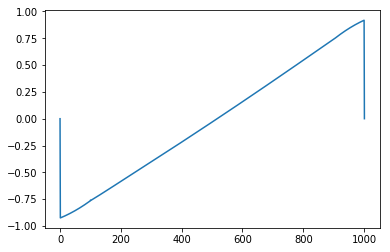

In [0]:
lp = sns.lineplot(x=np.arange(env.observation_space.n), y=V)

#### Approximate by Gradient MC method and state aggregation

#### What is state aggregation?
State aggregation is a simple form of generalising function approximation in which states are grouped together, with one estimated value (one component of the weight vector $\vec{w}$) for each group. The value of a state is estimated as its group's component, and when the state is updated, the component alone is updated.

i.e.
1. State aggregation is a special case of SGD in which the gradient  is 

\begin{equation}
\nabla \hat{v}(S_t, \vec{w}_t) =
\begin{cases}
1, \text{for } S_t \text{'s component} \\
0,  \text{otherwise}
\end{cases}
\end{equation}

In [0]:
import math

In [0]:
def generate_episode_random(policy, env, verbose=False):
    """
    Generate a sequence according to the policy
    """
    
    states, actions, rewards = [], [], []
    
    observation = env.reset()
    while True:
        if verbose:
            print(observation)
        states.append(observation)
#         action = policy(observation, env)
#         if verbose:
#             print("Action taken: %s" % action)
#         actions.append(action)
        observation, reward, done, info = env.step()
        rewards.append(reward)
        
        if done:           
            if verbose:
                print("Game end. End state: %s; Reward: %s" % (observation, reward))
            break
            
    return states, rewards


def random_policy(observations, env):
    return env.action_space.sample()

In [0]:
def func_v(s, w):
    """
    Construct a differentiable function v

    Args:
        s: State
        w: d-dimension weight vector

    Return:
        v, grad_v
    """

    assert s != 0
    assert s != 1001
    
    if s % 100 == 0:
        s_split = (s // 100) - 1
    else:
        s_split = s // 100

    grad_v = np.zeros(10)
    grad_v[s_split] = 1

    return w[s_split], grad_v

In [0]:
func_v(58, np.zeros(10))

(0.0, array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [0]:
def grad_mc_with_state_aggregation(env, policy, func_v,
                                   alpha=2e-5, gamma=1.0, num_episodes=10000):
    """
    Gradient MC method with state aggregation
    
    1. Separate the 100 states into 10 groups of 100 states each (excluding terminal states)
    2. Apply the Gradient Monte Carlo Algorithm
    """
    
    nS = env.observation_space.n
    w = np.zeros(DIM_W)
    
    for i in range(num_episodes):
        
        if i % 5000 == 0:
            print("Iteration %s. Current w: %s" % (i, w))
        
        states, rewards = generate_episode_random(policy, env)
#         print(states)
        
        G = np.sum(rewards)
#         print(G)
        
        for t in range(len(states)):
            
            if states[t] == 0 or states[t] == 1001:
                break
            
            v_hat, grad_v = func_v(states[t], w)
#             G = gamma * G + rewards[t]
            
            # Update w
            w += alpha * (G - v_hat) * grad_v
            
    return w  

In [0]:
env = RandomWalkEnv(1002, 500)
env.render()

Current position: 500

In [0]:
%%time
w = grad_mc_with_state_aggregation(env, random_policy, func_v, num_episodes=200000)

Iteration 0. Current w: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Iteration 5000. Current w: [-0.04863309 -0.16440897 -0.21729649 -0.17233404 -0.04503898  0.08806633
  0.20180109  0.23988676  0.1751122   0.0506517 ]
Iteration 10000. Current w: [-0.09628126 -0.30482712 -0.37042697 -0.26964865 -0.0870015   0.11563398
  0.29094406  0.38019193  0.30627435  0.09764906]
Iteration 15000. Current w: [-0.14112455 -0.40654129 -0.44085385 -0.29059225 -0.08209179  0.12379076
  0.32394865  0.44882546  0.40510621  0.14254737]
Iteration 20000. Current w: [-0.18392733 -0.48903045 -0.5031689  -0.33401853 -0.11318743  0.10267385
  0.31675131  0.48020953  0.48239803  0.18527813]
Iteration 25000. Current w: [-0.22520883 -0.55518839 -0.53062269 -0.34090285 -0.12196573  0.0866263
  0.3055423   0.50211376  0.54503656  0.22536821]
Iteration 30000. Current w: [-0.26387062 -0.60984951 -0.55669986 -0.34933284 -0.11442278  0.1033756
  0.32318281  0.53722365  0.59861017  0.26376717]
Iteration 35000. Current w: [-0.30014879 

In [0]:
w

array([-0.86945075, -0.78101032, -0.55508357, -0.3435995 , -0.10807082,
        0.1164297 ,  0.34210257,  0.56684471,  0.78756985,  0.86821532])

In [0]:
mc_approx = [func_v(x, w)[0] for x in np.arange(1, env.observation_space.n - 1)]

In [0]:
import pandas as pd

In [0]:
data_preproc = pd.DataFrame({"states": np.arange(1, env.observation_space.n - 1),
                             "dp_value": V[1:-1],
                             "mc_approx": mc_approx})

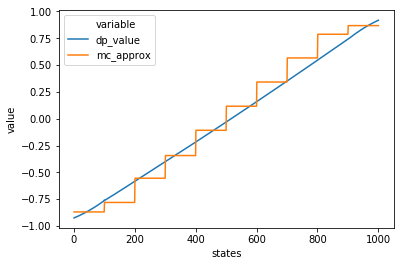

In [0]:
lp = sns.lineplot(x='states', y='value', hue='variable', 
                  data=pd.melt(data_preproc, ["states"]))

# Action-Value $Q(s,a)$ Function Approximation

For policy control, we need to approximate the action-value function such that $\hat{q}(s, a, \vec{w}) \approx q_*(s,a)$, where $\vec{w} \in \mathop{\mathbb{R}}^d$ is a finite-dimensional weight vector. 

In this section, we will cver the on-policy methods only.

### From approximating state value to action value

The objective is to approximate the action value function

\begin{equation}
\hat{q}(S, A, \vec{w}) \approx q_{\pi}(S, A)
\end{equation}

We can use the same approach as approximating state value function, but change into action-value. Suppose there is a true action-value $q_{\pi}(S,A)$

The objective function becomes
\begin{equation}
J(\vec{w}) = \mathop{\mathbb{E_{\pi}}}[(q_{\pi}(S,A) - \hat{q}(S, A, \vec{w}))^2]
\end{equation}

And, by using stochastic gradient descent to find a local minimum

\begin{equation}
\begin{split}
-\frac{1}{2} \nabla_{\vec{w}} J(\vec{w}) &= (q_{\pi}(S,A) - \hat{q}(S, A, \vec{w})) \nabla_{\vec{w}}\hat{q}(S,A,\vec{w})\\
\Delta \vec{w} &= \alpha [q_{\pi}(S,A) - \hat{q}(S,A,\vec{w})] \nabla_{\vec{w}}\hat{q}(S,A,\vec{w})
\end{split}
\end{equation}

### Approximation by using Linear methods
Similarly, the action-value function can be represented by linear combinations of features

\begin{equation}
\hat{q}(S, A, \vec{w}) = \vec{x}(S,A)^T \vec{w} = \sum_{j=1}^{n} x_j(S,A) w_j
\end{equation}

### The update process
\begin{equation}
\begin{split}
\nabla_{\vec{w}} \hat{q}(S, A, \vec{w}) &= \vec{x}(S,A) \\
\Delta \vec{w} &= \alpha [q_{\pi}(S,A) - \hat{q}(S, A, \vec{w})]\vec{x}(S,A)
\end{split}
\end{equation}

## Incremental Control Algorithms

Like prediction, we also need to substitute a target for $q_{\pi}(S,A)$

### 1. Monte Carlo Methods
For Monte Carlo method, the target is the return $G_t$, or we can assign $U_t = G_t$.

The gradient of the weight then become
\begin{equation}
\Delta{\vec{w}} = \alpha [G_t - \hat{q}(S_t,A_t,\vec{w_t})] \nabla_{\vec{w}}{\hat{q}}(S_t, A_t, \vec{w_t})
\end{equation}

### 2. SARSA(0) Methods

This method is called *episodic semi-gradient one-step SARSA*. For a constant policy, this method converges in the same way that TD(0) does, with the same kind of error bound.

\begin{equation}
\Delta{\vec{w}} = \alpha [R_{t+1} + \gamma \hat{q}(S_{t+1}, A_{t+1}, \vec{w}) - \hat{q}(S_t,A_t, \vec{w_t})] \nabla_{\vec{w}}{\hat{q}}(S_t, A_t, \vec{w_t})
\end{equation}

In order to form control methods, we need to plug the predicted action-value into the GPI framework. That is, for each possible action $a$ available in the current state $S_t$, we can compute $\hat{q}(S_t, A_t, \vec{w})$ and then find the greedy action $A_t^* = \text{argmax}_a \hat{q}(S_t, a, \vec{w}_{t-1})$. Considering the on-policy method, the policy improvement can be done by changing the estimation policy to a soft approximation of the greedy policy, such as $\epsilon$-greedy policy. 

##### Pseudocode
---
```
Input: a differentiable action-value function parameterisation q_hat(state, action, weights) |-> score
Algorithm parameters: stepsize alpha > 0, small eps > 0
Initialise value-function weights (D-dimensional zero vector)

Loop for each episode:
       Initialise State and action of episode (eps-greedy)
       
       Loop for each step of episode:
            Take action A, observe R, S'
            
            If S' is terminal:
                    w = w + alpha * (R - q_hat(S, A, w)) * grad_q(S, A, w)
                    break
                    
            Choose A' as a function of q_hat(S', ., w) (e.g. eps-greedy):
                    w = w + alpha * (R + gamma * q_hat(S', A', w) - q(S', A', w)) * grad_q(S, A, w)
                    
                    S = S'
                    A = A'
```
---

### 3. SARSA($\lambda$)

##### Forward-view
\begin{equation}
\Delta w = \alpha (q_t^{\lambda} - \hat{q}(S_t, A_t, \vec{w})) \nabla_{\vec{w}} \hat{q}(S_t, A_t, \vec{w})
\end{equation}

##### Backward-view
\begin{equation}
\begin{split}
\delta_t &= R_{t+1} + \gamma \hat{q}(S_{t+1}, A_{t+1}, \vec{w}) - \hat{q}(S_t, A_t, \vec{w}) \\
E_t &= \gamma \lambda E_{t-1} + \nabla_{\vec{w}}\hat{q}(S_t, A_t, \vec{w}) \\
\Delta{\vec{w}} &= \alpha \delta_t E_t
\end{split}
\end{equation}

### 4. Gradient TD
Not covered here


## Summary
![Prediction convergence summary](https://raw.githubusercontent.com/RLWH/reinforcement-learning-notebook/master/images/prediction_algos_convergence_summary.png)

![Control convergence summary](https://raw.githubusercontent.com/RLWH/reinforcement-learning-notebook/master/images/control_algo_convergence_summary.png)

# Exploiting the samples of data by using batch update

## Stochastic Gradient Descent with Experience Replay

Given expereince consisting of $\langle \text{state}, \text{value} \rangle$ pairs
\begin{equation}
D = \{\langle s_1, v_1^{\pi} \rangle\, \langle s_2, v_2^{\pi} \rangle\, ..., \langle s_T, v_T^{\pi} \rangle\}
\end{equation}

##### Algorithm
---
```
Repeat:

    1. Sample state, value from experience
    2. Apply stochastic gradient descent update
    w = w + alpha * (v_pi - v_hat(s, w)) * grad_w v(s, w)
    
Until it converges to least square solution
```
---

## Deep Q Network

Boostraping methods, as discussed previously, are not stable when it comes to non-linear approximation methods. DQN uses two tricks to stabalise with NN
1. Experience Replay
2. Fixed Q-targets

Method
1. Take action $a_t$ according to $\epsilon$-greedy policy
2. Store transition ($s_t, a_t, r_{t+1}, s_{t+1}$) in replay memory $D$
3. Sample random mini-batch of transitions ($s, a, r, s'$) from $D$
4. **Compute Q-learning targets w.r.t old, fixed parameters $w^-$**
5. Optimise MSE between Q-network and Q-learning agents
\begin{equation}
LS(\vec{w_i}) = \mathop{\mathbb{E_{s, a, r, s'}}} \Big[ (r + \gamma \max_{a'}Q(s', a'; w_i^{-}) - Q(s, a; w_i))^2 \Big]
\end{equation}

## One-step Linear Least Square Method for Linear approximators

If the approximator is a linear approximator, we can use an analytical method to find out the least square method. 

\begin{equation}
\begin{split}
\mathop{\mathbb{E}}_D[\Delta \vec{w}] &= 0\\
\alpha\sum_{t=1}^{T} \vec{x}(s_t)(v_t^{\pi} - x(s_t)^T\vec{w}) &= 0 \\
\sum_{t=1}^{T} \vec{x}(s_t)v_t^{\pi} &= \sum_{t=1}^{T} \vec{x}(s_t) \vec{x}(s_t)^T\vec{w} \\
\vec{w} &= \Big( \sum_{t=1}^T \vec{x}(s_t) \vec{x}(s_t)^T \Big)^{-1} \sum_{t=1}^T \vec{x}(s_t)v_t^{\pi}
\end{split}
\end{equation}